![Descripción de la imagen](image-2.png)


_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Análisis de reducción de dimensionalidad: PCA y t-SNE
## Objetivo General
En este trabajo, se busca que pongas en práctica la aplicación de algoritmos de reducción de dimensionalidad. El objetivo es aplicar técnicas para reducir la dimensionalidad a 2D, graficar los resultados y seleccionar la mejor técnica para los datos. Además, deberás detallar los pasos a seguir para la reducción de dimensionalidad y analizar los resultados obtenidos.

### Objetivos específicos 
* Entender los métodos de t-SNE y PCA.
* Realizar la reducción de dimensionalidad utilizando t-SNE y PCA.
* Comparar los resultados obtenidos con ambos métodos.
* Aplicar LDA para reducir el dataset a una bolsa de palabras por cada etiqueta.

### Tareas a Realizar:
Debes realizar esta actividad en el Notebook adjunto. A medida que avances, completa el código solicitado y responde a las preguntas que se plantean.
Las tareas a realizar son:

* Reducción de Dimensionalidad con t-SNE y PCA:
* Completa el código proporcionado en el notebook.
* Responde a las preguntas finales sobre los resultados obtenidos.

#### Punto adicional: Aplicación de LDA:

Utiliza la técnica de LDA para generar una bolsa de palabras para cada una de las etiquetas.





### Coloca en este espacio el nombre del estudiante

In [2]:
# Luis Alberto López González


### Dataset

#### Dataset

El dataset original proporcionado en el proyecto transversal ha sido adaptado para la realización de esta actividad. Esa adaptación ha incluido:
* Eliminación de nulos y duplicados
* Eliminación de URLs, emojis y menciones a los periódicos
* Eliminación de filas vacías
* Limpieza y homogeneización de datos.
* Convertir la totalidad del texto a minúscula
* Eliminar signos de puntuación
* Eliminar números
* Eliminar espacios en blanco adicionales
* Eliminar palabras con longitud menor a 2 caracteres
* Eliminar stopwords
* Tokenización
* Lematización

Proceso de extracción de características
* Conteo de palabras positivas (A)
* Conteo de palabras negativas (B)
* Conteo del número de bigrams más comunes (C)
* Conteo del número de menciones a otros usuarios (D)
* Categoría del sentimiento según librería ‘pysentimiento’ en español (E)
* Estandarización de las características (A_t,..E_t)
* Combinación de características f1*fi (iA..iE) (Valor1,..Valor10).

### Lectura de datos

In [3]:
import pandas as pd

# Leer el archivo CSV
#file_path = 'out.csv'
file_path = '../data/muinar07_act2_out.csv'  # Ruta relativa desde la carpeta notebooks
data = pd.read_csv(file_path)

# Obtener el número de filas y columnas
num_filas, num_columnas = data.shape

# Mostrar el número de filas y columnas
print(f"El dataset tiene {num_filas} filas y {num_columnas} columnas.")

El dataset tiene 10000 filas y 22 columnas.


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A           10000 non-null  int64  
 1   B           10000 non-null  int64  
 2   C           10000 non-null  int64  
 3   D           10000 non-null  int64  
 4   E           10000 non-null  int64  
 5   comentario  10000 non-null  object 
 6   label       10000 non-null  float64
 7   A_t         10000 non-null  float64
 8   B_t         10000 non-null  float64
 9   C_t         10000 non-null  float64
 10  D_t         10000 non-null  float64
 11  E_t         10000 non-null  float64
 12  Valor_1     10000 non-null  float64
 13  Valor_2     10000 non-null  float64
 14  Valor_3     10000 non-null  float64
 15  Valor_4     10000 non-null  float64
 16  Valor_5     10000 non-null  float64
 17  Valor_6     10000 non-null  float64
 18  Valor_7     10000 non-null  float64
 19  Valor_8     10000 non-null

In [5]:
##Cuántas categorías hay en la columna label
# Contar el número de categorías únicas en la columna 'label'

In [6]:
# Contar el número de categorías únicas en la columna 'label'
num_categorias = data['label'].nunique()
print(f"El número de categorías en la columna 'label' es: {num_categorias}.")

# Mostrar las categorías únicas en la columna 'label'
categorias_unicas = data['label'].unique()
print(f"Las categorías únicas en la columna 'label' son: {categorias_unicas}.")


El número de categorías en la columna 'label' es: 2.
Las categorías únicas en la columna 'label' son: [0. 1.].


In [7]:
# Obtener estadísticas descriptivas de las variables numéricas


# Obtener la frecuencia de las categorías en la columna 'label'


# Mostrar las estadísticas y la frecuencia de las categorías


In [8]:
# Estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
print(data.describe())

print("\n" + "="*50 + "\n")

# Frecuencia de las categorías en la columna 'label'
print("Frecuencia de las categorías en la columna 'label':")
frecuencia_label = data['label'].value_counts()
print(frecuencia_label)

print("\n" + "="*50 + "\n")

# Resumen de estadísticas y frecuencia de categorías
print("Resumen combinado:")
print(f"Estadísticas descriptivas:\n{data.describe()}\n")
print(f"Frecuencia de categorías en 'label':\n{frecuencia_label}")



Estadísticas descriptivas de las variables numéricas:
                  A             B             C             D             E  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.957400     26.098100      5.674600      0.091300      2.200600   
std        1.741864     34.012341      7.317149      0.352671      2.729488   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      1.000000      0.000000      0.000000   
50%        0.000000      5.000000      3.000000      0.000000      0.000000   
75%        1.000000     46.000000      7.000000      0.000000      6.000000   
max       24.000000    328.000000     88.000000      6.000000      6.000000   

              label           A_t           B_t           C_t           D_t  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.500000      0.735989      0.895389      1.014276     -0.241571 

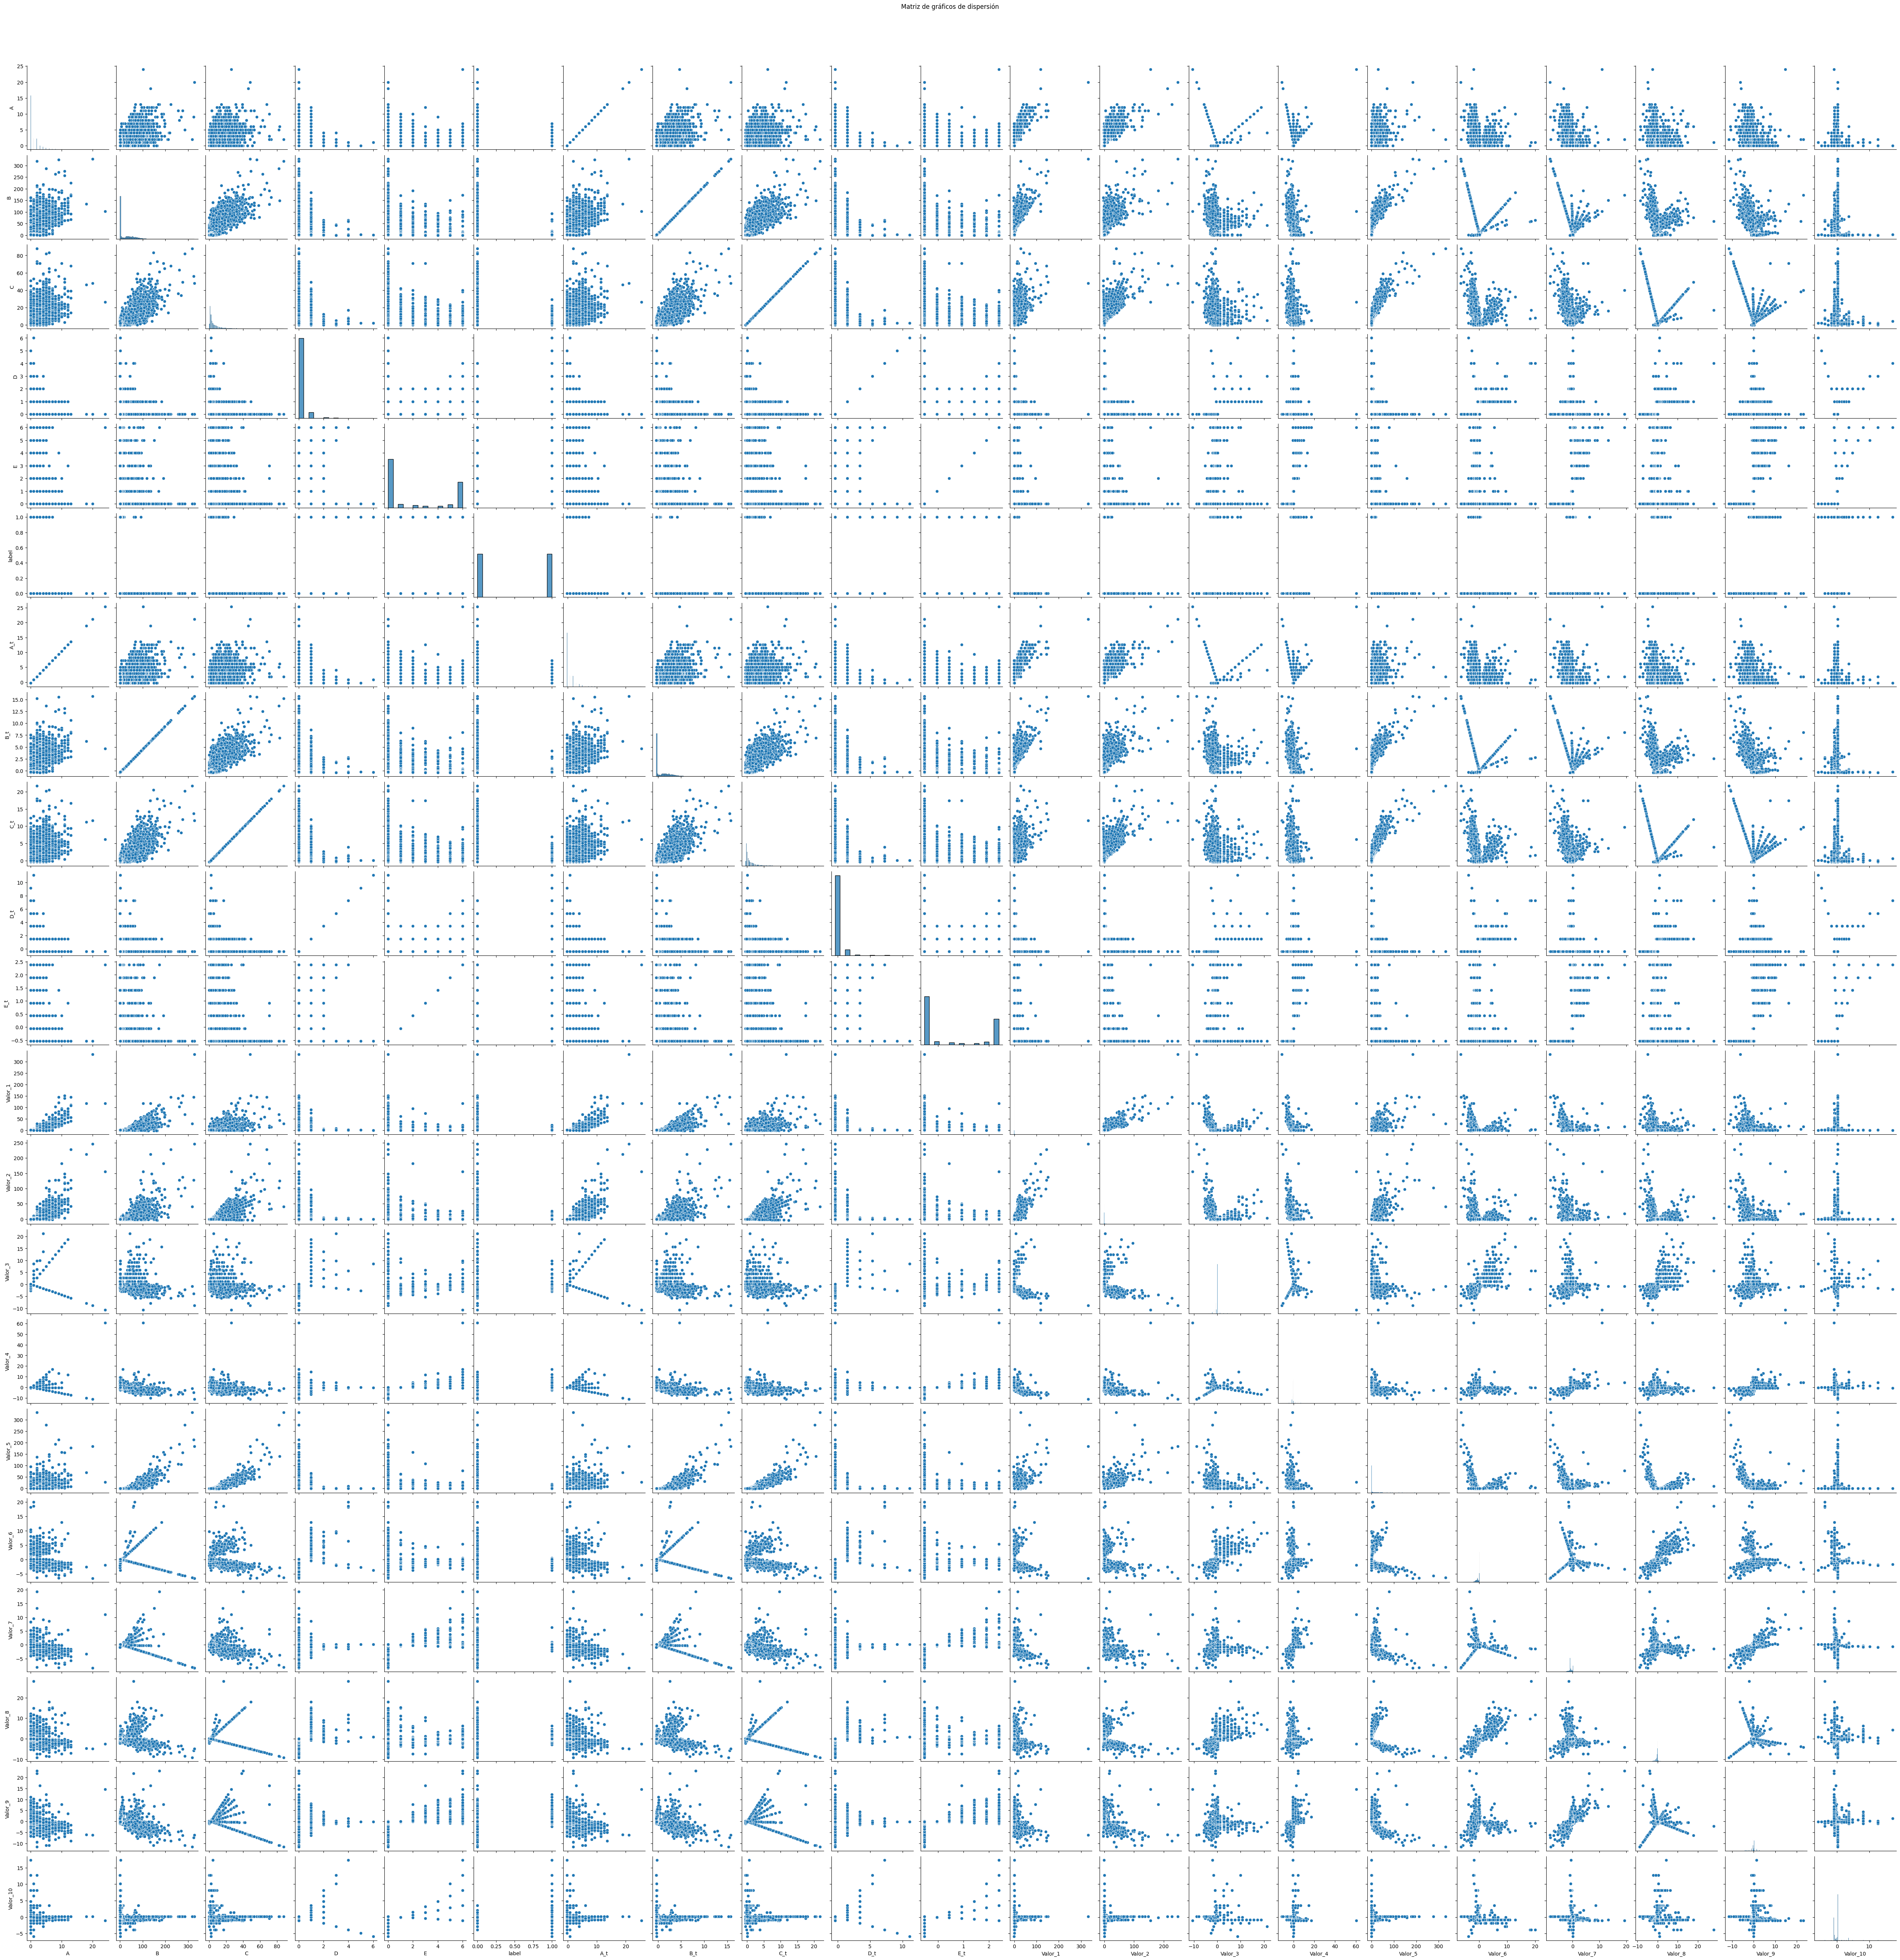

In [9]:
# Crear una matriz de gráficos de dispersión (pairplot)
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables cuantitativas
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Crear el pairplot
sns.pairplot(data[numerical_cols])
plt.suptitle("Matriz de gráficos de dispersión", y=1.02)  # Agregar título
plt.show()


In [10]:
# Eliminar columnas que empiecen por 'Valor_' y la columna 'comentario'

# Mostrar las primeras filas del nuevo dataframe para verificar


In [11]:
# Eliminar columnas que empiecen con 'Valor_' y la columna 'comentario'
columns_to_drop = [col for col in data.columns if col.startswith('Valor_')] + ['comentario']
data_cleaned = data.drop(columns=columns_to_drop)

# Mostrar las primeras filas del nuevo dataframe
print(data_cleaned.head())



   A   B   C  D  E  label       A_t       B_t        C_t       D_t       E_t
0  2  64  30  0  2    0.0  1.851102  2.759647   7.145831 -0.416577  0.440638
1  4  70  21  0  0    0.0  3.990202  3.054765   4.877255 -0.416577 -0.531099
2  4  88  50  0  0    0.0  3.990202  3.940120  12.187108 -0.416577 -0.531099
3  3  38  21  0  0    0.0  2.920652  1.480801   4.877255 -0.416577 -0.531099
4  0  59  17  0  0    0.0 -0.287998  2.513715   3.869000 -0.416577 -0.531099


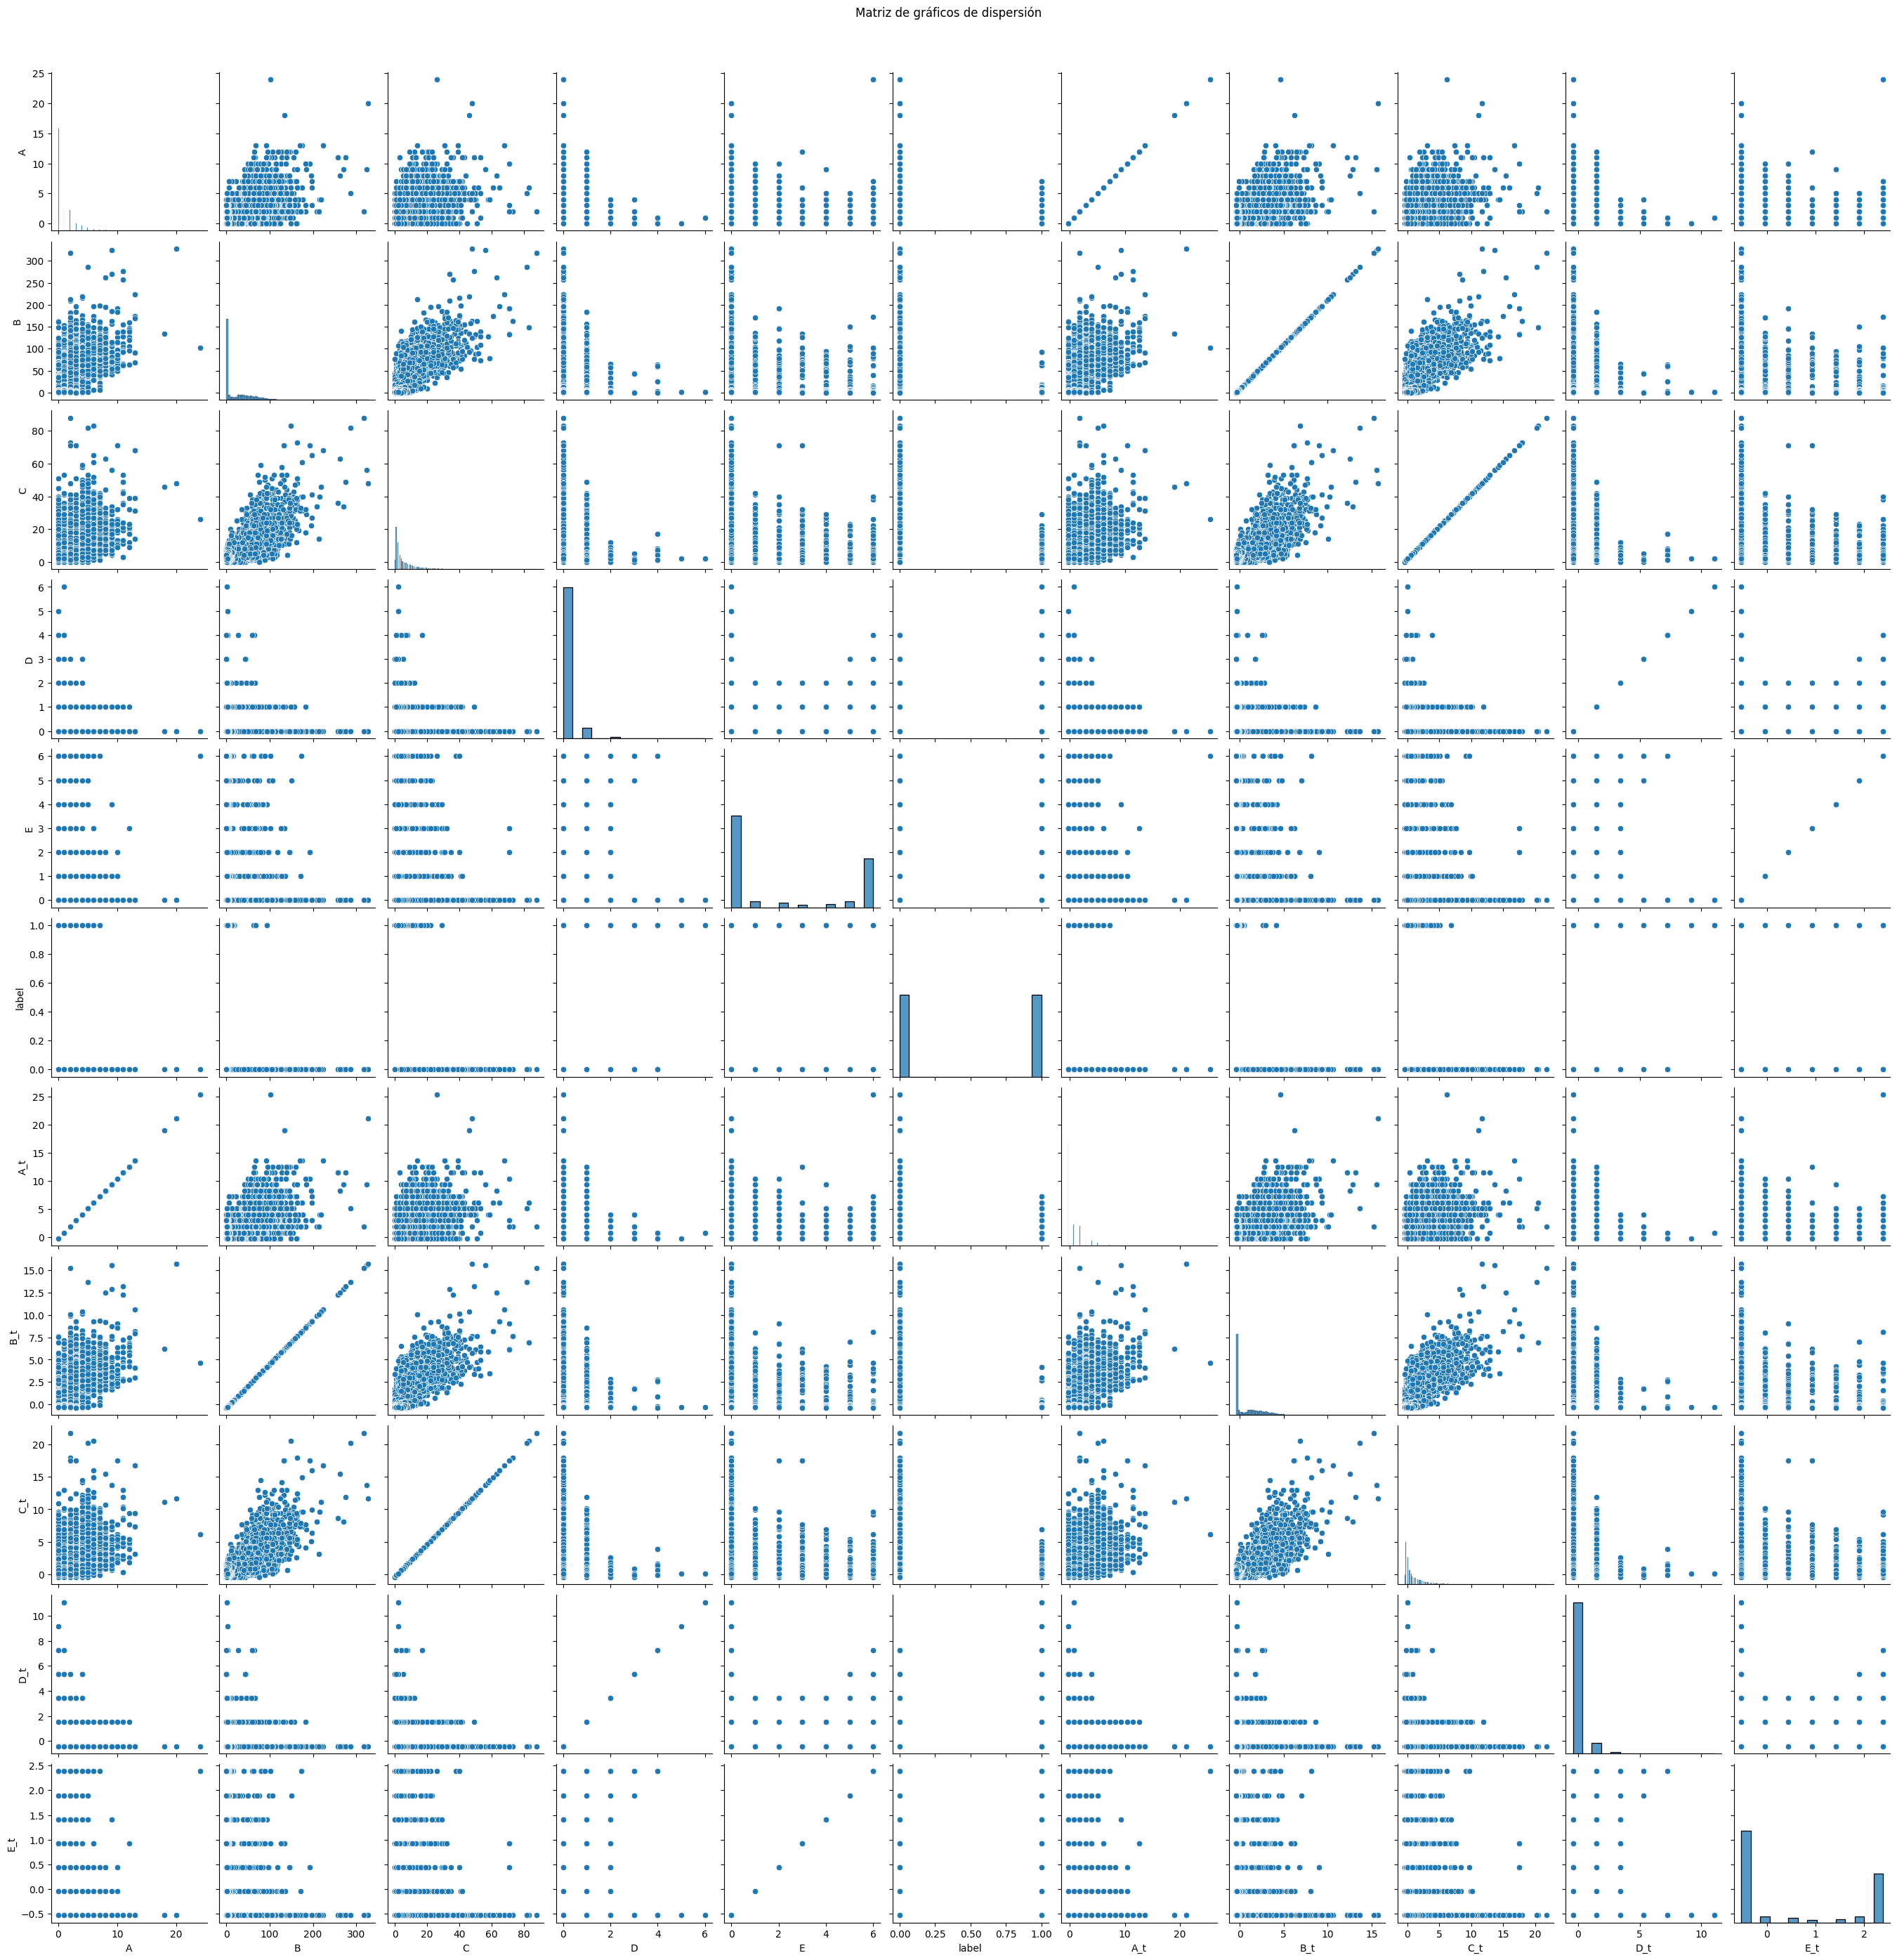

In [12]:
# Seleccionar solo las variables cuantitativas
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Crear el pairplot
sns.pairplot(data_cleaned[numerical_cols])
plt.suptitle("Matriz de gráficos de dispersión", y=1.02)  # Agregar título
plt.show()


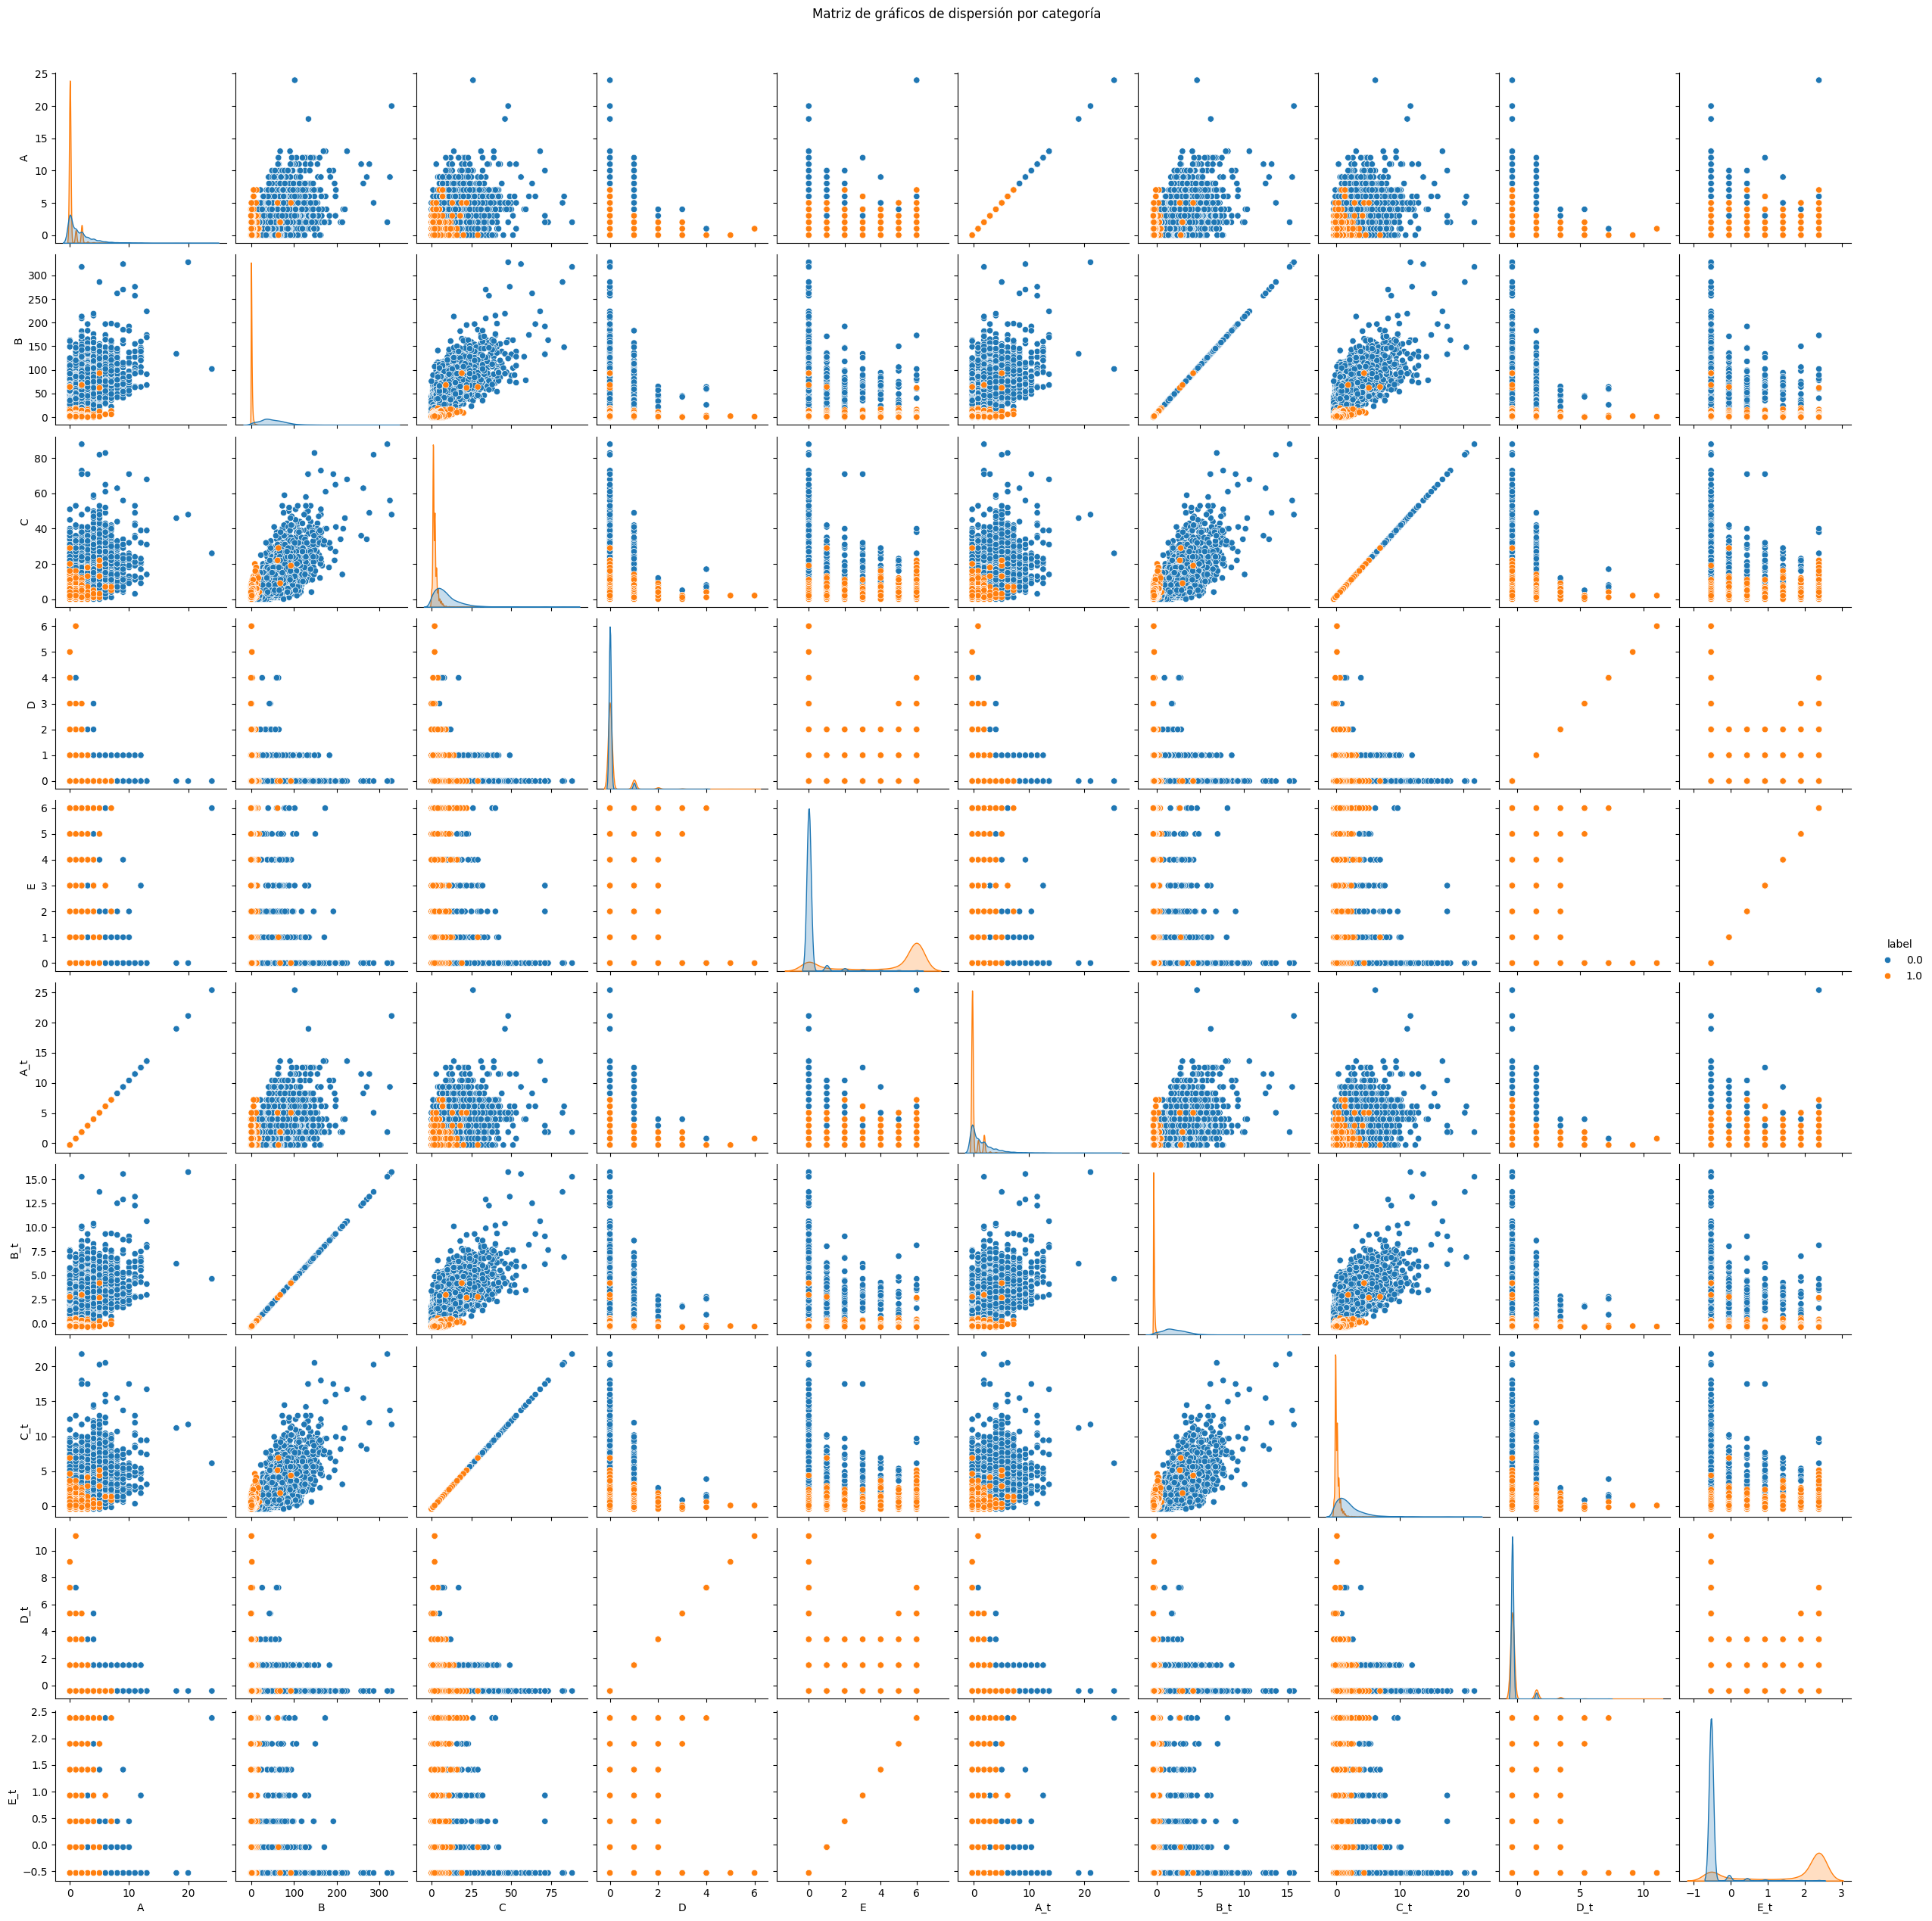

In [13]:
# Pairplot con colores según la categoría 'label'
sns.pairplot(data[numerical_cols], hue='label', diag_kind='kde', palette='tab10')
plt.suptitle("Matriz de gráficos de dispersión por categoría", y=1.02)
plt.show()

In [14]:
import numpy as np
corr_matrix = data_cleaned.corr()
print(corr_matrix)


              A         B         C         D         E     label       A_t  \
A      1.000000  0.574179  0.514770 -0.035345 -0.291708 -0.380072  1.000000   
B      0.574179  1.000000  0.789388 -0.076351 -0.558321 -0.731174  0.574179   
C      0.514770  0.789388  1.000000 -0.033210 -0.369224 -0.509732  0.514770   
D     -0.035345 -0.076351 -0.033210  1.000000  0.088191  0.130156 -0.035345   
E     -0.291708 -0.558321 -0.369224  0.088191  1.000000  0.754978 -0.291708   
label -0.380072 -0.731174 -0.509732  0.130156  0.754978  1.000000 -0.380072   
A_t    1.000000  0.574179  0.514770 -0.035345 -0.291708 -0.380072  1.000000   
B_t    0.574179  1.000000  0.789388 -0.076351 -0.558321 -0.731174  0.574179   
C_t    0.514770  0.789388  1.000000 -0.033210 -0.369224 -0.509732  0.514770   
D_t   -0.035345 -0.076351 -0.033210  1.000000  0.088191  0.130156 -0.035345   
E_t   -0.291708 -0.558321 -0.369224  0.088191  1.000000  0.754978 -0.291708   

            B_t       C_t       D_t       E_t  
A  

# Análisis de la matriz de correlación

## Correlaciones fuertes (positivas y negativas):
### Positivas fuertes:
- **A con B (0.574)**: Relación significativa entre palabras positivas y negativas.
- **B con C (0.789)**: Parece que el número de palabras negativas tiene una alta relación con los bigramas.

### Negativas fuertes:
- **B con E (-0.558)**: Más palabras negativas podrían estar asociadas con categorías de sentimiento negativo.
- **label con B (-0.731) y E (0.754)**: Esto sugiere que la etiqueta (`label`) está influenciada por estas características, indicando que `label` tiene relación con el sentimiento (`E`) y palabras negativas (`B`).

## Variables que aportan poca información:
- **D**: Tiene bajas correlaciones con casi todas las variables (< 0.1 o negativas débiles), por lo que puede tener poca influencia en PCA.

## Variables estandarizadas (_t):
- Las correlaciones entre las variables originales (`A`, `B`, etc.) y sus versiones estandarizadas (`A_t`, `B_t`, etc.) son **iguales a 1**, como se esperaba, porque estas son representaciones escaladas de las originales.



In [15]:
# Estandarizar las columnas, excepto 'label'

# Las variables ya están estandarizados, pero se puede hacer de nuevo

In [16]:
# Se estandarizan las variables numéricas A, B, C, D, y E para comparar
from sklearn.preprocessing import StandardScaler

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las variables numéricas
data_scaled = data_cleaned.copy()
data_scaled[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Mostrar las primeras filas del nuevo dataframe
print(data_scaled.head())

          A         B         C         D         E  label       A_t  \
0  0.598584  1.114413  3.324603 -0.258895 -0.073497   -1.0  0.598584   
1  1.746837  1.290828  2.094554 -0.258895 -0.806272   -1.0  1.746837   
2  1.746837  1.820075  6.058045 -0.258895 -0.806272   -1.0  1.746837   
3  1.172711  0.349946  2.094554 -0.258895 -0.806272   -1.0  1.172711   
4 -0.549669  0.967400  1.547866 -0.258895 -0.806272   -1.0 -0.549669   

        B_t       C_t       D_t       E_t  
0  1.114413  3.324603 -0.258895 -0.073497  
1  1.290828  2.094554 -0.258895 -0.806272  
2  1.820075  6.058045 -0.258895 -0.806272  
3  0.349946  2.094554 -0.258895 -0.806272  
4  0.967400  1.547866 -0.258895 -0.806272  


In [17]:
# Mostrar las primeras filas del dataframe original
print(data_cleaned.head())


   A   B   C  D  E  label       A_t       B_t        C_t       D_t       E_t
0  2  64  30  0  2    0.0  1.851102  2.759647   7.145831 -0.416577  0.440638
1  4  70  21  0  0    0.0  3.990202  3.054765   4.877255 -0.416577 -0.531099
2  4  88  50  0  0    0.0  3.990202  3.940120  12.187108 -0.416577 -0.531099
3  3  38  21  0  0    0.0  2.920652  1.480801   4.877255 -0.416577 -0.531099
4  0  59  17  0  0    0.0 -0.287998  2.513715   3.869000 -0.416577 -0.531099


In [18]:
# Separar las características y las etiquetas


In [19]:
# Separar características (variables estandarizadas) y etiquetas
X = data_cleaned[['A_t', 'B_t', 'C_t', 'D_t', 'E_t']]  # Características estandarizadas
y = data_cleaned['label']  # Etiquetas

# Verificar las dimensiones de las características y etiquetas
print(f"Dimensiones de X (características): {X.shape}")
print(f"Dimensiones de y (etiquetas): {y.shape}")



Dimensiones de X (características): (10000, 5)
Dimensiones de y (etiquetas): (10000,)


#     Pendientes para mañana:
1. Implementar PCA con las variables estandarizadas (A_t, B_t, C_t, D_t, E_t).
2. Analizar la proporción de varianza explicada por cada componente.
3. Visualizar los resultados de PCA en un gráfico de dispersión.




### PCA

In [20]:
# Aplicar PCA
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Crear el objeto PCA
pca_total = PCA(n_components=5) # Seleccionar 5 componentes principales y ver la varianza explicada

# Aplicar PCA a las características estandarizadas
X_pca = pca_total.fit_transform(X)

# Verificar las proporciones de varianza explicada
var_exp = pca_total.explained_variance_ratio_
print(f"Proporciones de varianza explicada:\n{var_exp}")
print(f"Varianza explicada total: {np.sum(var_exp)}") 


Proporciones de varianza explicada:
[0.64728771 0.15828189 0.11481921 0.04199374 0.03761745]
Varianza explicada total: 1.0


In [21]:
# Se observa que el primer componente principal explica casi el 65% de la varianza total, y que el plano factorial recogeria el 80% de la varianza total.
# Por lo cual, se puede reducir la dimensionalidad de los datos a 2 componentes principales.
# Inicializar PCA y establecer el número de componentes
pca = PCA(n_components=2)  # Reducir a 2 componentes principales

# Ajustar PCA y transformar los datos
X_pca = pca.fit_transform(X)

# Verificar la proporción de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Proporción de varianza explicada por cada componente: {explained_variance}")
print(f"Varianza total explicada: {sum(explained_variance)}")

Proporción de varianza explicada por cada componente: [0.64728771 0.15828189]
Varianza total explicada: 0.8055695959112006


In [22]:
# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Agregar la columna de etiquetas al DataFrame
pca_df['label'] = y.values

# Mostrar las primeras filas del nuevo DataFrame
print(pca_df.head())


         PC1       PC2  label
0   5.247372 -1.700621    0.0
1   5.465201  0.457154    0.0
2  10.247510 -2.278532    0.0
3   4.032182 -0.013041    0.0
4   2.322588 -2.627913    0.0


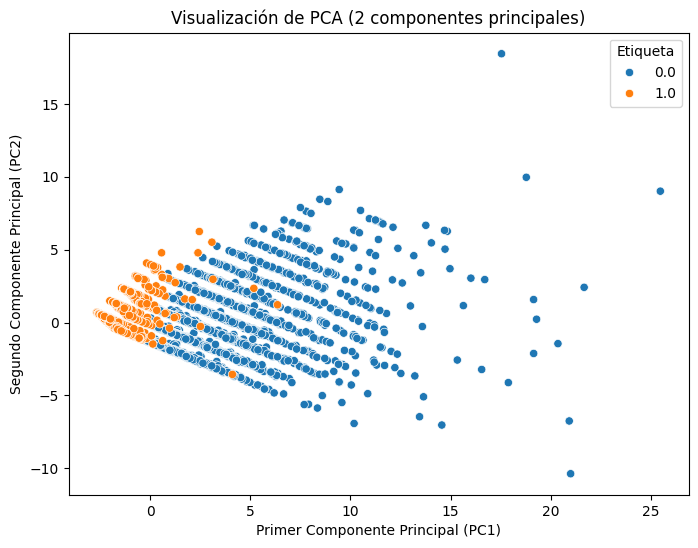

In [23]:
# Visualizar los resultados de PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='tab10')
plt.title('Visualización de PCA (2 componentes principales)')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.legend(title='Etiqueta')
plt.show()


### Apreciaciones sobre la proyección en el plano factorial
1. La etiqueta 1.0 (naranja) se concentra en la parte inferior izquierda, mientras que la etiqueta 0.0 (azul) está más dispersa a lo largo de los ejes.
2. Esto indica que las categorías tienen una cierta distinción en el espacio vectorial de PCA, aunque no son completamente linealmente separables.
3. Algunos puntos parecen estar alejados del grupo principal (outliers). Esto puede influir en el análisis si están relacionados con observaciones inusuales.
4. Si se revisa la proporción de varianza explicada por los 3 componentes principales se decide que vale la pena considerar un componente más y estudiar si el tercer compenente nos ofrezca la posibilidad de separar de mejor manera las etiquetas. No ahorramos la verificación de la varianza recogida por el espacio trdimensional factorial pues es del 92%.

In [24]:
pca_3 = PCA(n_components=3)  # Reducir a 3 componentes principales

# Ajustar PCA y transformar los datos
X_pca_3 = pca_3.fit_transform(X)

# Crear un DataFrame con los resultados de PCA
pca_df_3 = pd.DataFrame(X_pca_3, columns=['PC1', 'PC2', 'PC3'])

# Agregar la columna de etiquetas al DataFrame
pca_df_3['label'] = y.values

# Mostrar las primeras filas del nuevo DataFrame
print(pca_df_3.head())

         PC1       PC2       PC3  label
0   5.247372 -1.700621  3.020439    0.0
1   5.465201  0.457154  0.688192    0.0
2  10.247510 -2.278532  4.647228    0.0
3   4.032182 -0.013041  0.920540    0.0
4   2.322588 -2.627913  0.707537    0.0


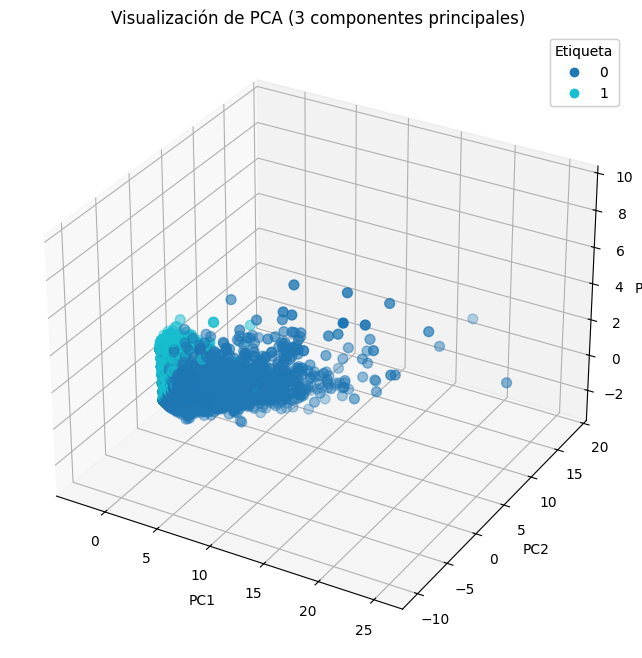

In [25]:
from mpl_toolkits.mplot3d import Axes3D  # Importar Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Asumimos que X_pca tiene 3 componentes principales
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)

# Graficar los puntos
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='tab10', s=50)

# Agregar etiquetas y título
ax.set_title('Visualización de PCA (3 componentes principales)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Agregar la leyenda
legend1 = ax.legend(*scatter.legend_elements(), title="Etiqueta")
ax.add_artist(legend1)

plt.show()



En comparación con el gráfico en 2D (PC1 vs. PC2), el tercer componente (PC3) parece agregar información que ayuda a discriminar un poco mejor las etiquetas.
Aunque todavía hay cierta superposición, especialmente en las áreas cercanas a los puntos más densos, puedes notar que algunos puntos con etiquetas 1 (probablemente en la parte superior del eje PC3) ahora están más claramente separados de los puntos con etiqueta 0.
En el espacio tridimensional, los puntos parecen estar agrupados en dos "regiones" principales, lo que indica que PCA está capturando relaciones útiles en los datos. Sin embargo, la separación entre etiquetas no es perfectamente lineal, lo que puede indicar que los datos tienen una estructura más compleja.

In [26]:
# Dividir los datos en conjunto de entrenamiento y prueba para PCA 3D
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca_3, y, test_size=0.2, random_state=1965)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Dimensiones de X_train: {X_train.shape}")


Dimensiones de X_train: (8000, 3)


In [27]:
# Entrenar un modelo de clasificación (por ejemplo, RandomForest)
# Importar el clasificador RandomForest
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador RandomForest
rf = RandomForestClassifier(random_state=1965)

# Entrenar el clasificador
rf.fit(X_train, y_train)

# Predecir y evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predecir las etiquetas del conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.97
Reporte de clasificación:
Matriz de confusión:
[[999  30]
 [ 26 945]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1029
         1.0       0.97      0.97      0.97       971

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



### Observaciones del ajuste del modelo 
1. El modelo clasificó correctamente el 97% de las observaciones del conjunto de datos. Es un rendimiento muy alto, especialmente considerando que estamos trabajando con datos transformados mediante PCA.
2. Para la clase 0.0:
    * Precisión (precision): 0.97 → El modelo clasificó correctamente el 97% de las predicciones hechas como clase 0.0.
    * Sensibilidad (recall): 0.97 → El modelo detectó el 97% de las observaciones de la clase 0.0.
    * F1-score: 0.97 → Balance entre precisión y sensibilidad.
3. Para la clase 1.0:
    * Métricas muy similares a la clase 0.0, lo que indica que el modelo tiene un desempeño balanceado para ambas clases.
4. Macro avg: Promedio simple de las métricas para ambas clases, útil cuando las clases tienen un tamaño balanceado (como en este caso).
5. Weighted avg: Promedio ponderado por el número de muestras en cada clase, útil para conjuntos de datos desbalanceados.

## Matriz de Confusión

La matriz de confusión proporciona detalles sobre los errores cometidos por el modelo:

|                | **Predicho 0.0** | **Predicho 1.0** |
|----------------|------------------|------------------|
| **Real 0.0**   | 999              | 30               |
| **Real 1.0**   | 26               | 945              |

### Errores de clasificación:
- **30 observaciones** de la clase **0.0** fueron clasificadas erróneamente como **1.0**.
- **26 observaciones** de la clase **1.0** fueron clasificadas erróneamente como **0.0**.
- En total, **56 errores** en un conjunto de **2000 muestras**, lo cual es **excelente**.


#### Analice los resultados obtenidos por PCA

El Análisis de Componentes Principales (PCA) aplicado en este proyecto tuvo como objetivo reducir la dimensionalidad del dataset y preservar la mayor cantidad posible de información relevante. A continuación, se presenta un análisis detallado de los resultados:

1. **Captura de información relevante**
   - Los tres primeros componentes principales (PC1, PC2 y PC3) explicaron una fracción significativa de la varianza total, 92%, lo que indica que PCA logró capturar las relaciones más importantes entre las variables originales.
   - Esto permitió comprimir la información de 5 variables en solo 3 componentes principales, reduciendo el ruido y redundancia del dataset.

2. **Visualización en 2D y 3D**
   - Los gráficos en 2D y 3D mostraron cómo los componentes principales permiten separar las etiquetas (`0.0` y `1.0`). Aunque en 2D ya era visible cierta separación, la inclusión del tercer componente mejoró la discriminación entre ambas clases.

3. **Resultados de clasificación**
   - Al utilizar los 3 componentes principales como entrada para un modelo Random Forest, se logró una precisión del **97%**.
   - El modelo mostró métricas balanceadas (precisión, recall y F1-score) para ambas clases, confirmando que los componentes principales contienen suficiente información discriminativa.

4. **Impacto del tercer componente**
   - El tercer componente principal (PC3) proporcionó información adicional que ayudó a mejorar la separación entre etiquetas. Esto se reflejó tanto en la visualización en 3D como en el desempeño del modelo.

5. **Limitaciones de PCA**
   - Aunque PCA es efectivo para capturar patrones lineales, no puede manejar relaciones no lineales entre variables. Si existieran estructuras más complejas, podrían explorarse técnicas como t-SNE o UMAP para complementarlo.

6. **Conclusión**
   - PCA fue una técnica exitosa en este análisis, ya que permitió reducir la dimensionalidad, facilitar la visualización y mejorar el desempeño del modelo de clasificación. La integración de PCA en el flujo de trabajo resultó en un modelo simplificado y altamente efectivo.



### t-SNE

#### Hiperparámetros recomendados para un primer t-SNE
1. n_components (Número de dimensiones a proyectar)
Se propone una configuración inicialcon **n_components=2**. La Justificación es comenzar con una visualización en 2D por comodidad visual útil para interpretar los resultados de forma gráfica. Posteriormente, se puede experimentar con **n_components=3** para proyectar en 3D.

2. Perplexity (Cantidad de vecinos considerados). Se configura este número en **perplexity=30**. Se justifica este valor como punto de partida para datasets medianos/grandes (entre 5,000 y 50,000 registros). Ajustarlo entre 5 y 50 permite capturar diferentes niveles de relaciones locales y globales en los datos.

3. learning_rate (Tasa de aprendizaje): Configuración inicial: learning_rate=200. La justificación es un valor moderado como 200 es adecuado para datos medianos.         Si los datos son más dispersos, podrías aumentar la tasa de aprendizaje (e.g., 500). Para datos muy densos, disminuirla (e.g., 10).

4. n_iter (Número de iteraciones).  Configuración inicial: n_iter=1,000. Esto garantiza que t-SNE converge adecuadamente. En datasets grandes, un rango común está entre 500 y 1,500.


### Notas Bibliográficas y Referencias

#### Notas Bibliográficas
1. **Van der Maaten y Hinton (2008):**
   - Sugieren que la perplexity debe estar entre **5 y 50** como un rango razonable para la mayoría de los conjuntos de datos.

2. **Wattenberg et al. (2016):**
   - Explican que la perplexity puede ajustarse dependiendo del tamaño del dataset, comenzando con **30** como valor inicial.

3. **Scikit-learn:**
   - Recomienda un `learning_rate=200` para escenarios generales, con ajustes según la dispersión de los datos.

---

#### Referencias relevantes sobre hiperparámetros en t-SNE

1. **Sobre perplexity como punto de partida (5 a 50):**
   - **Artículo original de t-SNE:**  
     Van der Maaten, L., & Hinton, G. (2008). *Visualizing Data using t-SNE.*  
     Disponible en: [https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)  
     En este artículo, los autores proponen perplexity como un hiperparámetro que controla el equilibrio entre relaciones locales y globales. Recomiendan valores entre 5 y 50 como adecuados en la mayoría de los casos.

2. **Sobre el impacto de perplexity en datasets grandes:**
   - Wattenberg, V., Viégas, F., & Johnson, I. (2016). *How to Use t-SNE Effectively.*  
     Disponible en: [https://distill.pub/2016/misread-tsne/](https://distill.pub/2016/misread-tsne/)  
     Este artículo práctico discute cómo elegir valores de perplexity dependiendo del tamaño del dataset. Sugieren que valores más bajos (5-30) resaltan relaciones locales, mientras que valores más altos (30-50) mejor capturan relaciones globales, especialmente para datasets más grandes.

3. **Sobre learning_rate inicial de 200:**
   - **Scikit-learn documentation:**  
     Disponible en: [https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)  
     En la documentación oficial de Scikit-learn, se menciona que un valor de `learning_rate=200` es adecuado para la mayoría de los casos. También indican que para datasets grandes o dispersos puede ser beneficioso aumentar este valor.

4. **Guía sobre t-SNE en datasets grandes y balanceados:**
   - Kobak, D., & Berens, P. (2019). *The art of using t-SNE for single-cell transcriptomics.* Nature Communications.  
     Disponible en: [https://www.nature.com/articles/s41467-019-13056-x](https://www.nature.com/articles/s41467-019-13056-x)  
     Este artículo describe cómo configurar t-SNE en diferentes contextos. Resaltan que perplexity puede ser adaptado a la densidad del dataset y recomiendan un valor inicial de **30** como punto de partida estándar.

5. **Sobre n_iter como parámetro clave para convergencia:**
   - Belkina, A. C., Ciccolella, C. O., Anno, R., Halpert, R., Spidlen, J., & Snyder-Cappione, J. E. (2019). *Automated optimized parameters for t-distributed stochastic neighbor embedding improve visualization and analysis of large datasets.* Nature Communications.  
     Disponible en: [https://www.nature.com/articles/s41467-019-13055-y](https://www.nature.com/articles/s41467-019-13055-y)  
     Este artículo explica cómo el número de iteraciones (`n_iter`) afecta la convergencia de t-SNE, recomendando al menos **1,000 iteraciones** para garantizar que los embeddings reflejen correctamente la estructura de los datos.



/media/luis/679bf4c6-b08e-405f-bf66-a325930f4245/2024/1. Maestria_UNIR_AI/2.Semestre 2/Aprendizaje Automático No Supervisado/Actividades/Actividad 2/muinar07_act2_individual/An-lisis-de-reducci-n-de-dimensionalidad-PCA-y-t-SNE/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


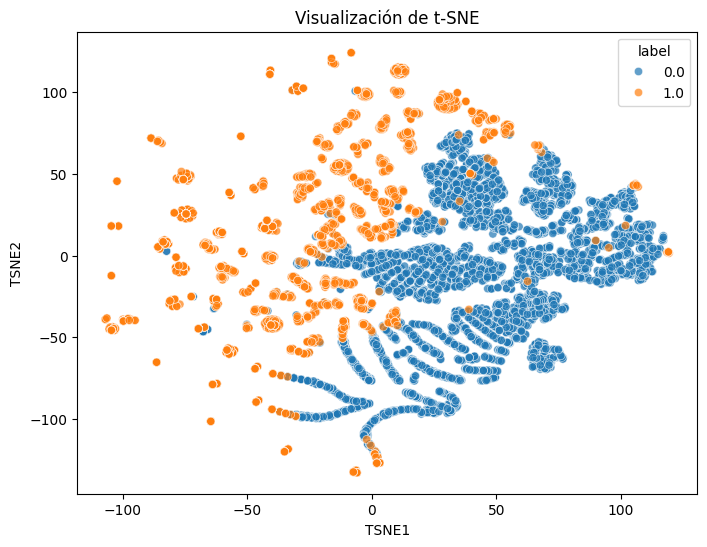

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial de t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)

# Aplicar t-SNE
X_tsne = tsne.fit_transform(X)

# Crear un DataFrame con los resultados
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = y.values

# Visualizar los resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='label', data=tsne_df, palette='tab10', alpha=0.7)
plt.title('Visualización de t-SNE')
plt.show()



#### Analice los resultados obtenidos por t-SNE

## Análisis y Comparación: t-SNE vs PCA

### 1. Análisis de Separación

#### Separación entre etiquetas
- **Etiqueta 0.0**
  - Las etiquetas de color azul ocupa más espacio en la gráfica, mostrando mayor dispersión dentro de su cluster.
  - Esto podría indicar una mayor variabilidad dentro de esta clase.

- **Etiqueta 1.0**
  - Forma clusters más compactos, etiquetas de color naranja.
  - Sugiere que los puntos de esta clase comparten características más consistentes.

#### Interpretación de la estructura
- Las formas **onduladas y ramificadas** son comunes en t-SNE debido a su capacidad para representar relaciones no lineales.
- Estas estructuras indican posibles **subgrupos** o relaciones más complejas dentro de las etiquetas.

---

### 3. Comparación con PCA

#### Ventajas de t-SNE
- Captura **relaciones no lineales** que PCA no puede representar.
- Esto se refleja en:
  - La organización de los clusters.
  - Las conexiones entre los puntos de cada etiqueta.

#### Limitaciones de t-SNE
- No preserva la **estructura global** de los datos:
  - Las distancias absolutas no tienen significado directo.
- No es adecuado para análisis numéricos posteriores:
  - Las coordenadas generadas son arbitrarias y específicas de la proyección.

---

### Resumen
- t-SNE es ideal para **visualizar estructuras locales y relaciones complejas**, mientras que PCA es más útil para representar **variaciones globales y análisis cuantitativo**.



### Utilizar t-SNE para clasificar

In [33]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y, test_size=0.2, random_state=1965)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Dimensiones de X_train_tsne: {X_train_tsne.shape}")

# Entrenar un modelo de clasificación (por ejemplo, RandomForest)
# Crear el clasificador RandomForest
rf_tsne = RandomForestClassifier(random_state=1965)

# Entrenar el clasificador
rf_tsne.fit(X_train_tsne, y_train_tsne)

# Predecir y evaluar el modelo
# Predecir las etiquetas del conjunto de prueba
y_pred_tsne = rf_tsne.predict(X_test_tsne)

# Calcular la precisión del modelo
accuracy_tsne = accuracy_score(y_test_tsne, y_pred_tsne)
print(f"Precisión del modelo con t-SNE: {accuracy_tsne:.2f}")

# Mostrar el reporte de clasificación
print("Reporte de clasificación con t-SNE:")

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test_tsne, y_pred_tsne))

# Reporte de clasificación
print(classification_report(y_test_tsne, y_pred_tsne))


Dimensiones de X_train_tsne: (8000, 2)
Precisión del modelo con t-SNE: 0.98
Reporte de clasificación con t-SNE:
Matriz de confusión:
[[1010   19]
 [  16  955]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1029
         1.0       0.98      0.98      0.98       971

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



#### ¿Se puede utilizar la reducción de dimensinalidad obtenida por t-SNE para entrenar un algoritmo de clasificación?

Depende sin duda del objetivo y las características del problema. Para este caso se puede afirmar que ha funcionado pero se debe ser cuidadoso. A continuación, se detallan los puntos clave:

1. **Propósito principal de t-SNE**
   - t-SNE es una técnica de reducción de dimensionalidad diseñada principalmente para **visualización exploratoria**. Su objetivo es representar datos de alta dimensión en 2D o 3D para comprender patrones y relaciones entre los datos.
   - Las coordenadas obtenidas en el espacio proyectado no tienen una estructura global preservada, lo que limita su uso como entrada directa para algoritmos supervisados.

2. **Ventajas de usar t-SNE en clasificación**
   - A pesar de no ser diseñado para este propósito, t-SNE puede generar representaciones que capturen relaciones no lineales entre las características, facilitando la separación de clases.
   - En el caso presentado, el uso de t-SNE para reducir el dataset a 2 dimensiones permitió entrenar un modelo de clasificación (Random Forest) con excelentes métricas:
     - Precisión: 98%
     - F1-score: 0.98
   - Esto demuestra que, en algunos casos, las proyecciones generadas por t-SNE pueden ser efectivas como entrada para algoritmos supervisados.

3. **Limitaciones de usar t-SNE para clasificación**
   - **Falta de reproducibilidad**
     - t-SNE produce resultados diferentes en cada ejecución, incluso con el mismo dataset, a menos que se fije el parámetro `random_state`.
   - **Escalabilidad**
     - t-SNE es computacionalmente intensivo y puede ser ineficiente para datasets muy grandes.
   - **Inestabilidad global**
     - Las distancias y relaciones globales no están garantizadas en el espacio reducido, lo que podría afectar algoritmos de clasificación que dependan de esa estructura.

4. **Alternativas más adecuadas**
   - Técnicas como **PCA** o **UMAP** son más recomendadas cuando el objetivo es generar entradas para modelos supervisados:
     - **PCA**: Preserva varianza global y es eficiente computacionalmente.
     - **UMAP**: Similar a t-SNE, pero con mejor preservación de relaciones globales y menor costo computacional.

5. **Conclusión**
   - Aunque no es el propósito principal de t-SNE, sus proyecciones pueden ser utilizadas para entrenar algoritmos de clasificación con buenos resultados, como se demostró en este caso.
   


### LDA

In [30]:
# Descargar las palabras vacías en español

# Preprocesar la columna 'comentario'

# Aplicar LDA

# Mostrar los temas


Preprocesamiento: Este paso convierte el texto en una matriz de términos.
Aplicación de LDA: Ejecuta el algoritmo LDA para encontrar los temas.
Visualización de Temas: Imprime los temas encontrados con las palabras más representativas.

### LDA en función del label

In [31]:
# Descargar las palabras vacías en español


# Definir función para aplicar LDA y obtener temas

# Aplicar LDA por cada etiqueta de label y guardar en archivos CSV
    # Crear un DataFrame para los temas

    
    # Guardar el DataFrame en un archivo CSV


In [32]:
# Generar bolsas de palabras para cada tema

# Asignar temas a comentarios

# Generar bolsas de palabras para cada etiqueta

# Asignar temas a comentarios y comparar con etiquetas reales

# Comparar temas asignados con etiquetas reales
